In [14]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
import cmocean
import datetime
import seaborn as sns
import pyproj
import matplotlib as mpl
import statistics
from statistics import stdev

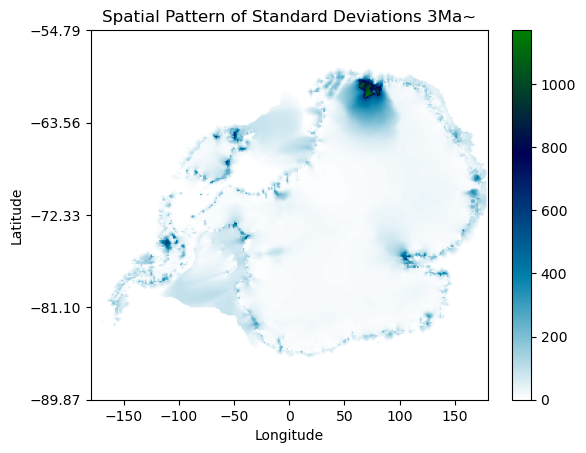

In [17]:
import netCDF4 as nc
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

data_file = '/Users/kyra/documents/Summer23/3shmergeh.nc'
dataset = nc.Dataset(data_file)

slat = xr.open_dataset('/Users/kyra/documents/Summer23/shout/lat_data.nc')
slat = slat.alatd
slon = xr.open_dataset('/Users/kyra/documents/Summer23/shout/lon_data.nc')
slon = slon.alond

# Extract the grid points variable from the dataset
grid_points = dataset['h'][:]

# Calculate the standard deviation of each grid point
std_devs = np.std(grid_points, axis=0)

# Create a spatial pattern plot using the standard deviations
x = slon.data
y = slat.data

plt.imshow(std_devs, cmap='ocean_r', extent=[x.min(), x.max(), y.min(), y.max()], aspect='auto')
plt.colorbar()
plt.title('Spatial Pattern of Standard Deviations 3Ma~')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

yticks = np.linspace(y.min(), y.max(), num=5)
plt.yticks(yticks)

plt.show()

dataset.close()